# Q1. 여러분은 파이썬을 통해 설문조사 문항의 응답내역을 분석하게 되었습니다. 문항별 응답내용에는 하나의 응답만 할 수 있는 single choice 문제와 여러 응답을 선택할 수 있는 multiple choice 문제가 있습니다. 2개를 구분하기 위해 single choice 문항 번호에 "_"를 표기하지 않기로 했습니다.

# 문항별 응답내역이 'question'에 담겨 있을 때, 조건문과 반복문을 사용하여 아래와 같은 결과가 출력되도록 코드를 작성해보세요.
# 출력예시: ['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9']

In [4]:
question = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3']
answer = []

In [5]:
for i in question:
    if '_' not in i:
        answer.append(i)

In [6]:
answer

['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9']

# Q2. 한스 로슬링(Hans Rosling, 1948년 7월 27일 ~ 2017년 2월 7일)은 스웨덴의 의사이자 통계학자로 비영리 벤처 갭마인더 재단의 공동설립자이기도 합니다. 빅데이터를 가장 잘 활용하는 보건 통계학자로 알려져 있습니다. 베스트셀러 책인 "팩트풀니스" 저자이기도 합니다. 갭마인더 사이트에서는 연도별, 국가별 GDP와 기대수명 데이터를 제공하고 있는데, 대표적으로 파이썬 라이브러리 중 'seaborn'에서 제공되는 예제 데이터가 있습니다. 오늘은 이 데이터를 활용해 문제를 풀어보겠습니다.

## 다음의 데이터는 연도, 국가별 기대수명을 나타내고 있는 데이터 입니다. 2011년 부터의 연도별, 국가별 평균 기대수명을 구해주세요. (2011년도 포함되게 구합니다.)

## [필수 조건] groupby 나 pivot_table을 활용합니다. groupby 로 구할 때 unstack()이라는 기능을 사용하여 아래와 같이 컬럼에 인덱스 값을 올려서 표기할 수 있습니다.

## 만약 행에는 '연도'가, 열에 '국가'가 들어있고 수치 데이터의 결과값이 아래와 같다면, 출력형태는 조금 달라도 괜찮습니다.

## 데이터는 다음의 방법으로 읽어옵니다.


In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/healthexp.csv")
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


## Sort_Values & delete NULL

In [29]:
df.sort_values(by = ['Year','Country','Life_Expectancy'] ,inplace = True)
df

,Year,Country,Spending_USD,Life_Expectancy
1,1970,France,192.143,72.2
0,1970,Germany,252.311,70.6
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
270,2020,France,5468.418,82.3
269,2020,Germany,6938.983,81.1
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [38]:
df_subset = df.pivot(index = 'Year',columns = 'Country', values = 'Life_Expectancy')
df_subset.dropna(inplace = True)
df_subset

Country,Canada,France,Germany,Great Britain,Japan,USA
Year,,,,,,
1980,75.2,74.3,72.9,73.2,76.1,73.7
1985,76.3,75.4,75.0,74.7,77.6,74.7
1990,77.3,77.0,77.3,75.7,78.9,75.3
1992,77.8,77.5,76.1,76.3,79.2,75.7
1993,77.8,77.5,76.1,76.2,79.4,75.5
1994,77.9,78.0,76.5,76.8,79.8,75.7
1995,78.0,78.1,76.6,76.7,79.6,75.7
1996,78.2,78.2,76.9,76.9,80.3,76.1
1997,78.3,78.6,77.3,77.2,80.5,76.5


# 3번


In [118]:
traffic = pd.read_csv('/Users/gangmin/documents/외부활동/부스트코스 데이터사이언스/Traffic.csv',encoding = "cp949")
traffic.head()

,집계년도,시군명,시군코드,관리기관명,단속일시,단속동,단속장소,단속구분
0,2019,서울특별시,3220000,강남구,2019-01-01 0:00,역삼동,672-34,PDA
1,2019,서울특별시,3220000,강남구,2019-01-01 0:10,삼성동,77-23,PDA
2,2019,서울특별시,3220000,강남구,2019-01-01 0:12,삼성동,77-23,PDA
3,2019,서울특별시,3220000,강남구,2019-01-01 0:13,삼성동,77-23,PDA
4,2019,서울특별시,3220000,강남구,2019-01-01 0:21,논현동,200-6,PDA


In [119]:
traffic['시군명'].unique()
traffic['집계년도'].unique()
traffic['시군코드'].nunique()
traffic['관리기관명'].unique()

array(['강남구'], dtype=object)

In [120]:
traffic['단속장소'].value_counts(ascending = False).head()

도산대로 부근          12050
도곡로 부근            7097
삼성로 부근            6718
도곡로 510 주변        6699
서울 강남구 청담동 77     5856
Name: 단속장소, dtype: int64

In [121]:
counts = traffic['단속장소'].value_counts().reset_index()

In [122]:
counts

,index,단속장소
0,도산대로 부근,12050
1,도곡로 부근,7097
2,삼성로 부근,6718
3,도곡로 510 주변,6699
4,서울 강남구 청담동 77,5856
...,...,...
35719,118-14 링크,1
35720,44-12 스타벅스,1
35721,47-4 우리들병원,1
35722,700-9 대청타워,1


In [123]:
counts['단속장소']

0        12050
1         7097
2         6718
3         6699
4         5856
         ...  
35719        1
35720        1
35721        1
35722        1
35723        1
Name: 단속장소, Length: 35724, dtype: int64

In [124]:
traffic2 = traffic

In [127]:
traffic2['단속회수'] = traffic.groupby('단속장소')['단속장소'].transform('count') #단속장소의 value_count를 단속회수라는 파생변수를 만듦. 
traffic2

,집계년도,시군명,시군코드,관리기관명,단속일시,단속동,단속장소,단속구분,단속회수
0,2019,서울특별시,3220000,강남구,2019-01-01 0:00,역삼동,672-34,PDA,1.0
1,2019,서울특별시,3220000,강남구,2019-01-01 0:10,삼성동,77-23,PDA,16.0
2,2019,서울특별시,3220000,강남구,2019-01-01 0:12,삼성동,77-23,PDA,16.0
3,2019,서울특별시,3220000,강남구,2019-01-01 0:13,삼성동,77-23,PDA,16.0
4,2019,서울특별시,3220000,강남구,2019-01-01 0:21,논현동,200-6,PDA,25.0
...,...,...,...,...,...,...,...,...,...
605768,2021,서울특별시,3220000,강남구,2021-09-30 23:19,대치동,1012-94,시민신고웹,5.0
605769,2021,서울특별시,3220000,강남구,2021-09-30 23:34,역삼동,647,PDA,81.0
605770,2021,서울특별시,3220000,강남구,2021-09-30 23:41,도곡동,946,PDA,155.0
605771,2021,서울특별시,3220000,강남구,2021-09-30 23:43,도곡동,946,PDA,155.0


In [132]:
traffic2['단속회수'].describe()

count    605743.000000
mean       1448.344154
std        2296.265165
min           1.000000
25%          46.000000
50%         430.000000
75%        1846.000000
max       12050.000000
Name: 단속회수, dtype: float64

In [134]:
q3 = traffic['단속회수'].quantile(0.75) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = traffic['단속회수'].quantile(0.25)

iqr = q3 - q1

In [138]:
print(q3)
print(q1)
print(iqr)

1846.0
46.0
1800.0


<AxesSubplot:xlabel='단속회수', ylabel='Density'>

/opt/anaconda3/envs/my_conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/my_conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/my_conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/my_conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


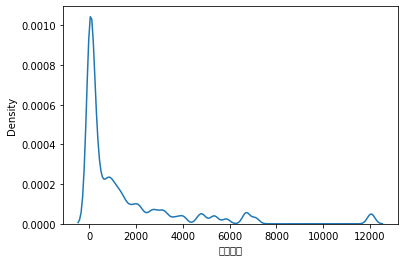

In [140]:
sns.kdeplot(x= traffic2['단속회수'])
#Positive Skewness를 지닌 것으로 나타남. 

In [142]:
traffic2['단속회수'].describe()

count    605743.000000
mean       1448.344154
std        2296.265165
min           1.000000
25%          46.000000
50%         430.000000
75%        1846.000000
max       12050.000000
Name: 단속회수, dtype: float64

In [1]:
True == '1'

False